In [4]:
import pandas as pd
import numpy as np

In [5]:
vacc = pd.read_csv(r'D:\imarticus\datasets\h1n1_vaccine_prediction.csv')

In [6]:
vacc.head()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0


In [7]:
vacc.h1n1_worry            =  vacc.h1n1_worry.fillna(0)
vacc.h1n1_awareness        = vacc.h1n1_awareness.fillna(1)
vacc.antiviral_medication  = vacc.antiviral_medication.fillna(0)
vacc.contact_avoidance     = vacc.contact_avoidance.fillna(0)
vacc.bought_face_mask      =vacc.bought_face_mask.fillna(0)
vacc.wash_hands_frequently=vacc.wash_hands_frequently.fillna(0)
vacc.avoid_large_gatherings=vacc.avoid_large_gatherings.fillna(0)
vacc.reduced_outside_home_cont=vacc.reduced_outside_home_cont.fillna(0)

vacc.avoid_touch_face=vacc.avoid_touch_face.fillna(0)
vacc.dr_recc_h1n1_vacc=vacc.dr_recc_h1n1_vacc.fillna(0)
vacc.dr_recc_seasonal_vacc=vacc.dr_recc_seasonal_vacc.fillna(0)
vacc.chronic_medic_condition= vacc.chronic_medic_condition.fillna(0)
vacc.cont_child_undr_6_mnths= vacc.cont_child_undr_6_mnths.fillna(0)
vacc.is_health_worker=vacc.is_health_worker.fillna(0)
vacc.has_health_insur =  vacc.has_health_insur.fillna(0)
vacc.is_h1n1_vacc_effective= vacc.is_h1n1_vacc_effective.fillna(2)

vacc.is_h1n1_risky = vacc.is_h1n1_risky.fillna(2) 
vacc.sick_from_h1n1_vacc=  vacc.sick_from_h1n1_vacc.fillna(2)
vacc.is_seas_vacc_effective=  vacc.is_seas_vacc_effective.fillna(2)
vacc.is_seas_risky =  vacc.is_seas_risky.fillna(2)
vacc.sick_from_seas_vacc= vacc.sick_from_seas_vacc.fillna(2)
vacc.qualification=  vacc.qualification.fillna("12 Years")
vacc.income_level= vacc.income_level.fillna("<= $75,000, Above Poverty")
vacc.marital_status=  vacc.marital_status.fillna("Not Married")

vacc.housing_status=  vacc.housing_status.fillna("Rent")
vacc.employment=  vacc.employment.fillna("Employed")
vacc.no_of_adults=  vacc.no_of_adults.fillna(1)
vacc.no_of_children=  vacc.no_of_children.fillna(1)


In [8]:
vacc = vacc.iloc[:, 1: ]



In [9]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder() 



In [10]:
vacc[  vacc.select_dtypes(include=['object']).columns     ]   = vacc[   vacc.select_dtypes(include=['object']).columns     ].apply(le.fit_transform)


In [8]:
Df = vacc      # insert your dataframe name between <--->.

from sklearn.model_selection import train_test_split
train,test = train_test_split(Df,test_size =.2,random_state = 555)

train_x = train.iloc[:,0:-1]   # select columns with (x) independent variables
train_y = train.iloc[:,-1]     # select column  with (y) dependent variable

test_x = test.iloc[:,0:-1]     # select columns with (x) independent variables
test_y = test.iloc[:,-1]       # select column  with (y) dependent variable

# issential import for model building
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()

# model fitting
log_reg.fit( train_x , train_y)

# predictions
pred = log_reg.predict(test_x)

# performance metrics
from sklearn.metrics import confusion_matrix
tab = confusion_matrix(pred,test_y)
print('predicted vs actual')
print(tab)

print('diagonal elements')
print(tab.diagonal())
print('sum of diagonal elements')
print(tab.diagonal().sum())

print('overall accuracy')
print(tab.diagonal().sum()*100/tab.sum())

print('accuracy of class zero{TNR}')
print(tab[0,0]/(tab[1,0]+tab[0,0]))

print('accuracy of class one{TPR}')
print(tab[1,1]/(tab[0,1]+tab[1,1]))

print('error for class zero{FPR}')
print(tab[1,0]/(tab[0,1]+tab[0,0]))

print('error for class one')
print(tab[0,1]/(tab[0,1]+tab[1,1]))

print('precision')
print(tab[1,1]/(tab[1,0]+tab[1,1]))

from sklearn.metrics import accuracy_score
accuracy_score(pred,test_y)
print('accuracy score')
print(accuracy_score(pred,test_y))

from sklearn.metrics import precision_score
precision_score(test_y,pred)
print('precision score')
print(precision_score(test_y,pred))

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
log_roc_auc = roc_auc_score(test_y,pred)

pred_value_prob = log_reg.predict_proba(test_x)

fpr,tpr,threshold = roc_curve(test_y,pred_value_prob[:,1])


print('coefficients-->',log_reg.coef_)
print('intercept-->',log_reg.intercept_)
print('Predict proba-->',log_reg.predict_proba(test_x)) # predictions in probabilities

predicted vs actual
[[3942  615]
 [ 227  558]]
diagonal elements
[3942  558]
sum of diagonal elements
4500
overall accuracy
84.23811306626732
accuracy of class zero{TNR}
0.9455504917246342
accuracy of class one{TPR}
0.47570332480818417
error for class zero{FPR}
0.049813473776607414
error for class one
0.5242966751918159
precision
0.710828025477707
accuracy score
0.8423811306626732
precision score
0.710828025477707
coefficients--> [[ 9.46922844e-03  2.22050227e-01  1.40984436e-01 -5.99196362e-02
   1.77176828e-01  3.94681176e-02 -1.23358790e-01 -2.28327831e-04
   3.98225883e-02  1.97557249e+00 -4.80255515e-01 -6.19922001e-03
   3.09819557e-01  7.92019699e-01  1.42867473e+00  5.15190334e-01
   4.28567273e-01  6.21547256e-04  2.96915074e-02  1.31432717e-01
  -8.67888106e-02  1.26775197e-01 -1.88972976e-02  9.12957300e-02
   2.20511469e-01 -4.35174614e-02 -6.92775130e-02  2.23470423e-01
  -5.02493326e-02  4.64414448e-02  2.34951751e-02  2.21344124e-02]]
intercept--> [-7.11611516]
Predict p

C:\Users\danga\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


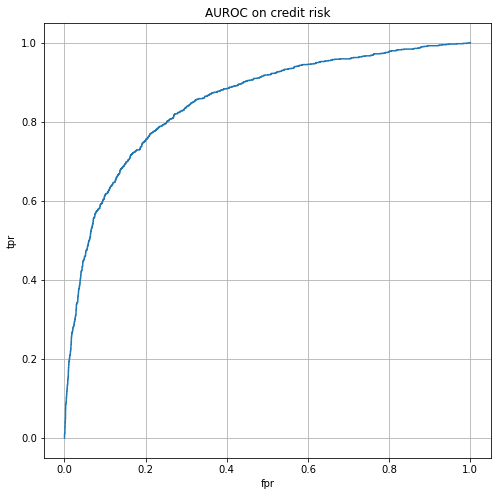

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
plt.plot(fpr,tpr)
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('AUROC on credit risk')
plt.grid()

# class balancing  improve the model

In [10]:
Df = vacc      # insert your dataframe name between <--->.

from sklearn.model_selection import train_test_split
train,test = train_test_split(Df,test_size =.2,random_state = 555)

train_x = train.iloc[:,0:-1]   # select columns with (x) independent variables
train_y = train.iloc[:,-1]     # select column  with (y) dependent variable

test_x = test.iloc[:,0:-1]     # select columns with (x) independent variables
test_y = test.iloc[:,-1]       # select column  with (y) dependent variable


# issential import for model building
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(class_weight ='balanced') # here we have managed to solve class imballence issue

# model fitting
log_reg.fit( train_x , train_y)

# predictions
pred = log_reg.predict(test_x)

# performance metrics
from sklearn.metrics import confusion_matrix
tab = confusion_matrix(pred,test_y)
print('predicted vs actual')
print(tab)

print('diagonal elements')
print(tab.diagonal())
print('sum of diagonal elements')
print(tab.diagonal().sum())

print('overall accuracy')
print(tab.diagonal().sum()*100/tab.sum())


print('accuracy of class zero{TNR}')
print(tab[0,0]/(tab[1,0]+tab[0,0]))

print('accuracy of class one{TPR}')
print(tab[1,1]/(tab[0,1]+tab[1,1]))

print('error for class zero{FPR}')
print(tab[1,0]/(tab[0,1]+tab[0,0]))

print('error for class one')
print(tab[0,1]/(tab[0,1]+tab[1,1]))

print('precision')
print(tab[1,1]/(tab[1,0]+tab[1,1]))

from sklearn.metrics import accuracy_score
accuracy_score(pred,test_y)
print('accuracy score')
print(accuracy_score(pred,test_y))

from sklearn.metrics import precision_score
precision_score(test_y,pred)
print('precision score')
print(precision_score(test_y,pred))

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
log_roc_auc = roc_auc_score(test_y,pred)

pred_value_prob = log_reg.predict_proba(test_x)

fpr,tpr,threshold = roc_curve(test_y,pred_value_prob[:,1])


print('coefficients-->',log_reg.coef_)
print('intercept-->',log_reg.intercept_)
print('Predict proba-->',log_reg.predict_proba(test_x)) # predictions in probabilities

predicted vs actual
[[3361  306]
 [ 808  867]]
diagonal elements
[3361  867]
sum of diagonal elements
4228
overall accuracy
79.1463871209285
accuracy of class zero{TNR}
0.8061885344207244
accuracy of class one{TPR}
0.7391304347826086
error for class zero{FPR}
0.22034360512680665
error for class one
0.2608695652173913
precision
0.5176119402985074
accuracy score
0.791463871209285
precision score
0.5176119402985074
coefficients--> [[ 0.04349599  0.19735586  0.23416192 -0.03230545  0.20482299  0.0605146
  -0.14540526  0.02568093  0.02045858  2.0720406  -0.52370806  0.00396362
   0.28157723  0.81259685  1.35136588  0.47953489  0.40656895 -0.00844649
   0.00872946  0.1284996  -0.08801144  0.11892388 -0.03415419  0.06029882
   0.22831022 -0.04665252 -0.03462481  0.2862061  -0.04995789  0.04383461
   0.04987723  0.02241177]]
intercept--> [-5.43785975]
Predict proba--> [[0.65631544 0.34368456]
 [0.85003117 0.14996883]
 [0.55491497 0.44508503]
 ...
 [0.89304568 0.10695432]
 [0.88125626 0.1187437

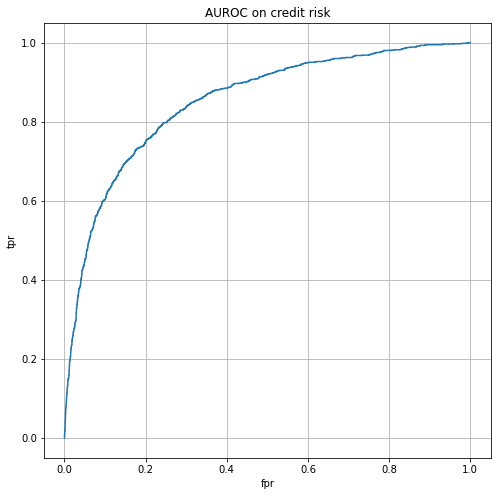

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
plt.plot(fpr,tpr)
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('AUROC on credit risk')
plt.grid()

first model is good for running the campeign
and model 2 is good for prediction

# manual class balancing

In [12]:
Df = vacc      # insert your dataframe name between <--->.

In [13]:

from sklearn.model_selection import train_test_split
train,test = train_test_split(Df,test_size =.2,random_state = 555)

In [14]:
train_x = train.iloc[:,0:-1]   # select columns with (x) independent variables
train_y = train.iloc[:,-1]     # select column  with (y) dependent variable

test_x = test.iloc[:,0:-1]     # select columns with (x) independent variables
test_y = test.iloc[:,-1]       # select column  with (y) dependent variable



In [15]:
# class imbalancing by oversampling

df1 = train[train.h1n1_vaccine==1]
train = pd.concat([train,df1])

In [16]:


# issential import for model building
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression() 

# model fitting
log_reg.fit( train_x , train_y)

# predictions
pred = log_reg.predict(test_x)

# performance metrics
from sklearn.metrics import confusion_matrix
tab = confusion_matrix(pred,test_y)
print('predicted vs actual')
print(tab)

print('diagonal elements')
print(tab.diagonal())
print('sum of diagonal elements')
print(tab.diagonal().sum())

print('overall accuracy')
print(tab.diagonal().sum()*100/tab.sum())


print('accuracy of class zero{TNR}')
print(tab[0,0]/(tab[1,0]+tab[0,0]))

print('accuracy of class one{TPR}')
print(tab[1,1]/(tab[0,1]+tab[1,1]))

print('error for class zero{FPR}')
print(tab[1,0]/(tab[0,1]+tab[0,0]))

print('error for class one')
print(tab[0,1]/(tab[0,1]+tab[1,1]))

print('precision')
print(tab[1,1]/(tab[1,0]+tab[1,1]))

from sklearn.metrics import accuracy_score
accuracy_score(pred,test_y)
print('accuracy score')
print(accuracy_score(pred,test_y))

from sklearn.metrics import precision_score
precision_score(test_y,pred)
print('precision score')
print(precision_score(test_y,pred))

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
log_roc_auc = roc_auc_score(test_y,pred)

pred_value_prob = log_reg.predict_proba(test_x)

fpr,tpr,threshold = roc_curve(test_y,pred_value_prob[:,1])


print('coefficients-->',log_reg.coef_)
print('intercept-->',log_reg.intercept_)
print('Predict proba-->',log_reg.predict_proba(test_x)) # predictions in probabilities

predicted vs actual
[[3942  615]
 [ 227  558]]
diagonal elements
[3942  558]
sum of diagonal elements
4500
overall accuracy
84.23811306626732
accuracy of class zero{TNR}
0.9455504917246342
accuracy of class one{TPR}
0.47570332480818417
error for class zero{FPR}
0.049813473776607414
error for class one
0.5242966751918159
precision
0.710828025477707
accuracy score
0.8423811306626732
precision score
0.710828025477707
coefficients--> [[ 9.46922844e-03  2.22050227e-01  1.40984436e-01 -5.99196362e-02
   1.77176828e-01  3.94681176e-02 -1.23358790e-01 -2.28327831e-04
   3.98225883e-02  1.97557249e+00 -4.80255515e-01 -6.19922001e-03
   3.09819557e-01  7.92019699e-01  1.42867473e+00  5.15190334e-01
   4.28567273e-01  6.21547256e-04  2.96915074e-02  1.31432717e-01
  -8.67888106e-02  1.26775197e-01 -1.88972976e-02  9.12957300e-02
   2.20511469e-01 -4.35174614e-02 -6.92775130e-02  2.23470423e-01
  -5.02493326e-02  4.64414448e-02  2.34951751e-02  2.21344124e-02]]
intercept--> [-7.11611516]
Predict p

C:\Users\danga\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


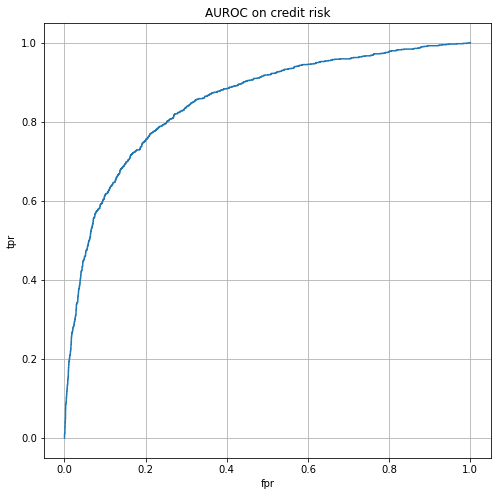

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
plt.plot(fpr,tpr)
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('AUROC on credit risk')
plt.grid()

# feature selection using boruta

In [12]:
x = vacc.iloc[:,0:-1]   
y = vacc.iloc[:,-1]

In [13]:
vac_x = np.array(x)
vac_y = np.array(y)

In [14]:
from boruta import BorutaPy

In [15]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(class_weight='balanced',criterion='entropy')

In [16]:
boruta_feature_selector = BorutaPy(rf,max_iter= 30,verbose=2,random_state=555)

In [17]:
boruta_feature_selector.fit(vac_x,vac_y)

Iteration: 	1 / 30
Confirmed: 	0
Tentative: 	32
Rejected: 	0
Iteration: 	2 / 30
Confirmed: 	0
Tentative: 	32
Rejected: 	0
Iteration: 	3 / 30
Confirmed: 	0
Tentative: 	32
Rejected: 	0
Iteration: 	4 / 30
Confirmed: 	0
Tentative: 	32
Rejected: 	0
Iteration: 	5 / 30
Confirmed: 	0
Tentative: 	32
Rejected: 	0
Iteration: 	6 / 30
Confirmed: 	0
Tentative: 	32
Rejected: 	0
Iteration: 	7 / 30
Confirmed: 	0
Tentative: 	32
Rejected: 	0
Iteration: 	8 / 30
Confirmed: 	5
Tentative: 	0
Rejected: 	27


BorutaPy finished running.

Iteration: 	9 / 30
Confirmed: 	5
Tentative: 	0
Rejected: 	27


BorutaPy(estimator=RandomForestClassifier(class_weight='balanced',
                                          criterion='entropy',
                                          n_estimators=1000,
                                          random_state=RandomState(MT19937) at 0x16D6609D240),
         max_iter=30, random_state=RandomState(MT19937) at 0x16D6609D240,
         verbose=2)

In [18]:
boruta_feature_selector.support_

array([False, False, False, False, False, False, False, False, False,
        True, False, False, False, False,  True,  True,  True, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False])

In [19]:
df1 = pd.DataFrame({"feature": x.columns, "importance" : boruta_feature_selector.support_})

In [20]:
df1.sort_values('importance', ascending=False)

,feature,importance
16,is_h1n1_risky,True
9,dr_recc_h1n1_vacc,True
15,is_h1n1_vacc_effective,True
14,has_health_insur,True
19,is_seas_risky,True
27,housing_status,False
26,marital_status,False
25,income_level,False
18,is_seas_vacc_effective,False
28,employment,False


In [21]:
df1[df1.importance==True]

,feature,importance
9,dr_recc_h1n1_vacc,True
14,has_health_insur,True
15,is_h1n1_vacc_effective,True
16,is_h1n1_risky,True
19,is_seas_risky,True
